# 5. Complete Pipeline Example

This notebook demonstrates the complete active learning pipeline using your actual code.

We'll walk through:
1. Initializing the ActiveLearner
2. Running multiple active learning cycles
3. Visualizing the results
4. Understanding the API endpoints

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

# Add parent directory to path
sys.path.insert(0, str(Path().absolute().parent.parent))

import logging

# Set logging level for the core.active_learner module
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    force=True  # Override any existing configuration
)

# Or target specific logger
logger = logging.getLogger('core.active_learner')
logger.setLevel(logging.DEBUG)

import sys
import logging
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, force=True)

from core.active_learner import ActiveLearner

## Step 1: Initialize the ActiveLearner

This loads:
- Embeddings from `.npy` files
- Annotations from CSV
- Initializes the neural network model

In [2]:
# Define paths (adjust these to match your setup)
BASE_DIR = Path().absolute().parent.parent
# results\test_data\embeddings\2025-11-13_21-42___birdnet-test_data\audio\esc50
EMBEDDINGS_DIR = BASE_DIR / "results" / "test_data" / "embeddings" / "2025-11-13_21-42___birdnet-test_data" / "audio" / "esc50"
ANNOTATIONS_PATH = BASE_DIR / "results" / "test_data" / "evaluations" / "birdnet" / "classification" / "default_classifier_annotations.csv"

print(f"Checking paths:")
print(f"EMBEDDINGS_DIR: {EMBEDDINGS_DIR}")
print(f"  Exists: {EMBEDDINGS_DIR.exists()}")
print(f"ANNOTATIONS_PATH: {ANNOTATIONS_PATH}")
print(f"  Exists: {ANNOTATIONS_PATH.exists()}")
print()

if EMBEDDINGS_DIR.exists() and ANNOTATIONS_PATH.exists():
    # Initialize active learner
    learner = ActiveLearner(
        embeddings_dir=EMBEDDINGS_DIR,
        annotations_path=ANNOTATIONS_PATH,
        model_name="birdnet",
        dataset_name="esc50",
        hidden_dim=512,  # Reduce from 1024 to 512
        learning_rate=0.001,
        device="cpu"
    )
    
    # Print initial state
    state = learner.get_state()
    print(f"\n=== Initial State ===")
    print(f"Total samples: {state['n_labeled'] + state['n_unlabeled']}")
    print(f"Labeled: {state['n_labeled']}")
    print(f"Unlabeled: {state['n_unlabeled']}")
    print(f"Number of classes: {state['num_classes']}")
    print(f"Classes: {state['labels']}")
else:
    print("\n⚠️ Data not found! Make sure you have:")
    print("1. Generated embeddings")
    print("2. Created annotations CSV")

ACTIVE LEARNER INIT CALLED
Loading annotations from: c:\Users\bjmcewen\OneDrive - Tilburg University\Documents\GitHub\BaseAL\results\test_data\evaluations\birdnet\classification\default_classifier_annotations.csv
Loaded 4000 annotations


Checking paths:
EMBEDDINGS_DIR: c:\Users\bjmcewen\OneDrive - Tilburg University\Documents\GitHub\BaseAL\results\test_data\embeddings\2025-11-13_21-42___birdnet-test_data\audio\esc50
  Exists: True
ANNOTATIONS_PATH: c:\Users\bjmcewen\OneDrive - Tilburg University\Documents\GitHub\BaseAL\results\test_data\evaluations\birdnet\classification\default_classifier_annotations.csv
  Exists: True

INFO:core.active_learner:Loaded 4000 embeddings with shape (4000, 1024)
INFO:core.active_learner:Initialized ActiveLearner with 4000 samples and 50 classes

=== Initial State ===
Total samples: 4000
Labeled: 0
Unlabeled: 4000
Number of classes: 50
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


## Step 2: Run Active Learning Cycles

Each cycle:
1. Samples new examples (random or uncertainty-based)
2. Adds them to labeled set
3. Trains the model
4. Evaluates performance

In [ ]:
# Run 5 active learning cycles
n_cycles = 5
n_samples_per_cycle = 20
epochs_per_cycle = 20

history = []

print("=== Running Active Learning Cycles ===")

for cycle in range(n_cycles):
    print(f"\n--- Cycle {cycle + 1}/{n_cycles} ---")
    
    # Sample next batch
    selected_indices = learner.sample(n_samples=n_samples_per_cycle)
    print(f"Selected indices: {selected_indices}")
    
    # Add to labeled set
    learner.add_samples(selected_indices)
    
    # Train model
    metrics = learner.train_step(epochs=epochs_per_cycle, batch_size=8)
    print(f"Loss: {metrics['loss']:.4f}, Accuracy: {metrics['accuracy']:.4f}")
    print(f"Labeled: {metrics['n_labeled']}, Unlabeled: {metrics['n_unlabeled']}")
    
    # Store for plotting
    history.append(metrics)

print("\n=== Training Complete ===")
print(history)

=== Running Active Learning Cycles ===

--- Cycle 1/1 ---
Selected indices: [2981, 1738, 3295, 2244, 1658, 1269, 839, 1441, 3192, 2860, 791, 3621, 119, 1088, 2355, 824, 1012, 1890, 2707, 3051, 731, 887, 1665, 2822, 3794, 3868, 2744, 3944, 741, 1491, 2254, 323, 1320, 1940, 1058, 2096, 1858, 1528, 1115, 1257, 1170, 195, 428, 2494, 1154, 1278, 2851, 2443, 82, 2689, 1013, 2921, 329, 2198, 1954, 2146, 1048, 2910, 2450, 2043, 38, 1956, 1640, 284, 2850, 2278, 635, 2272, 3328, 2663, 1789, 2708, 565, 257, 1174, 3776, 1795, 481, 2230, 235, 3899, 3566, 3054, 3177, 2301, 3359, 1512, 1118, 300, 1606, 3222, 1078, 3581, 875, 492, 3553, 3185, 494, 28, 3174, 533, 713, 1357, 1744, 2550, 1258, 1418, 2500, 3999, 1860, 303, 3861, 3834, 3599, 891, 2677, 2040, 621, 3510, 2178, 1069, 2304, 2819, 3845, 1832, 2334, 1068, 541, 2801, 3978, 1106, 2317, 1803, 2784, 2363, 821, 1932, 1866, 3101, 3507, 603, 2877, 2849, 529, 681, 3291, 1549, 2411, 1887, 2863, 837, 388, 2787, 3080, 3060, 3698, 3519, 1297, 1086, 1057, 15

## Step 3: Visualize Training Progress

Plot how loss and accuracy changed over cycles.

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\bjmcewen\\AppData\\Local\\miniconda3\\envs\\active\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\bjmcewen\\AppData\\Local\\miniconda3\\envs\\active\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c

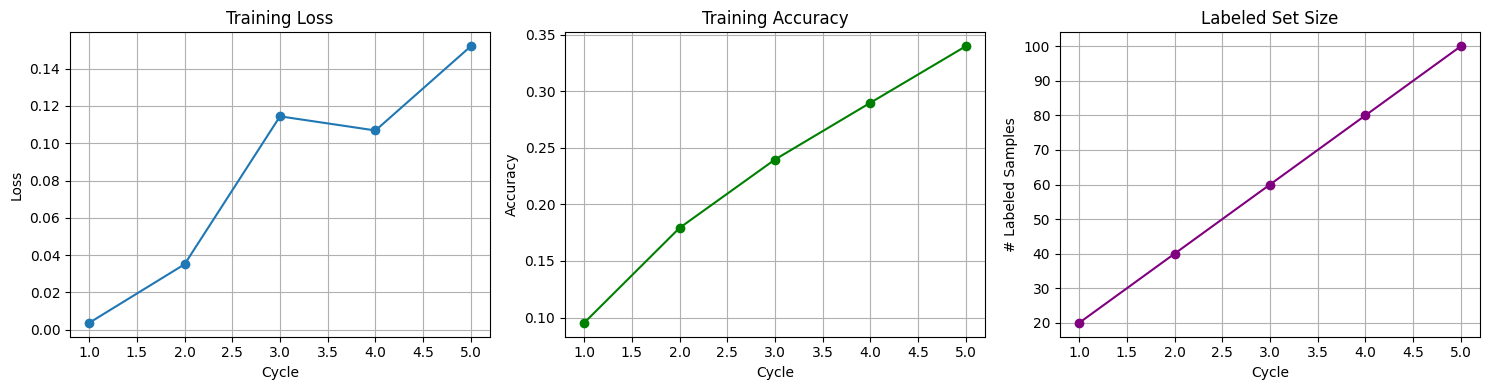

In [4]:
# Extract metrics
losses = [h['loss'] for h in history]
accuracies = [h['accuracy'] for h in history]
n_labeled = [h['n_labeled'] for h in history]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loss
axes[0].plot(range(1, len(losses) + 1), losses, marker='o')
axes[0].set_xlabel('Cycle')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].grid(True)

# Accuracy
axes[1].plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='green')
axes[1].set_xlabel('Cycle')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy')
axes[1].grid(True)

# Number of labeled samples
axes[2].plot(range(1, len(n_labeled) + 1), n_labeled, marker='o', color='purple')
axes[2].set_xlabel('Cycle')
axes[2].set_ylabel('# Labeled Samples')
axes[2].set_title('Labeled Set Size')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Step 4: Visualize Embeddings in 3D

Use PCA to reduce the learned embeddings to 3D and visualize how classes cluster.

In [5]:
# Get 3D embeddings
embeddings_3d = learner.get_embeddings_3d()

# Get labels
labels = learner.labels
label_names = [learner.idx_to_label[label] for label in labels]

# Create labeled/unlabeled mask
labeled_mask = np.array([i in learner.labeled_indices for i in range(len(embeddings_3d))])

print(f"3D embeddings shape: {embeddings_3d.shape}")
print(f"Number of labeled: {labeled_mask.sum()}")
print(f"Number of unlabeled: {(~labeled_mask).sum()}")

INFO:core.active_learner:Fitting PCA transformation (will be reused for all subsequent calls)
3D embeddings shape: (4000, 3)
Number of labeled: 100
Number of unlabeled: 3900


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\bjmcewen\\AppData\\Local\\miniconda3\\envs\\active\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\bjmcewen\\AppData\\Local\\miniconda3\\envs\\active\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\bjmcewen\\AppData\\Local\\miniconda3\\envs\\active\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch

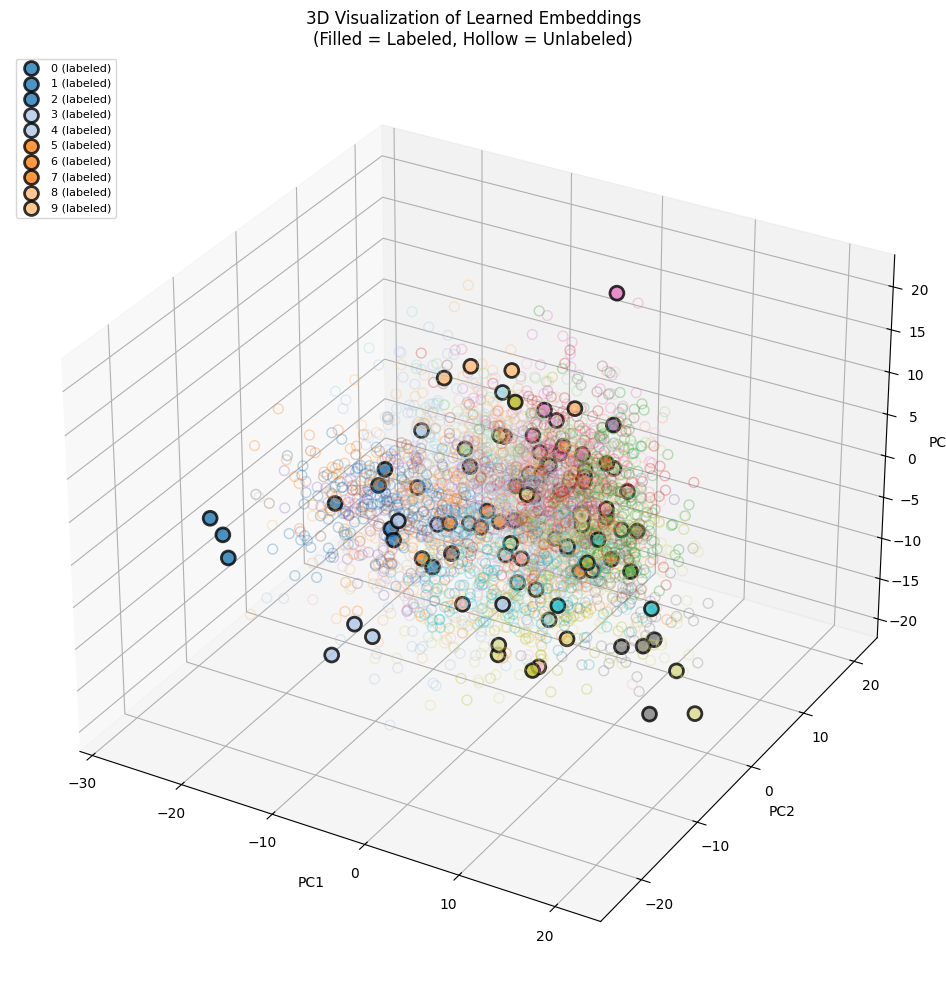

In [6]:
# Plot 3D visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique labels
unique_labels = np.unique(labels)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

# Plot each class
for idx, label in enumerate(unique_labels):
    mask = labels == label
    
    # Labeled samples (filled circles)
    labeled_samples = mask & labeled_mask
    if labeled_samples.any():
        ax.scatter(
            embeddings_3d[labeled_samples, 0],
            embeddings_3d[labeled_samples, 1],
            embeddings_3d[labeled_samples, 2],
            c=[colors[idx]],
            s=100,
            alpha=0.8,
            marker='o',
            label=f'{learner.idx_to_label[label]} (labeled)',
            edgecolors='black',
            linewidths=2
        )
    
    # Unlabeled samples (hollow circles)
    unlabeled_samples = mask & ~labeled_mask
    if unlabeled_samples.any():
        ax.scatter(
            embeddings_3d[unlabeled_samples, 0],
            embeddings_3d[unlabeled_samples, 1],
            embeddings_3d[unlabeled_samples, 2],
            c='none',
            s=50,
            alpha=0.3,
            marker='o',
            edgecolors=colors[idx],
            linewidths=1
        )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of Learned Embeddings\n(Filled = Labeled, Hollow = Unlabeled)')

# Legend (only show first few classes to avoid clutter)
handles, labels_legend = ax.get_legend_handles_labels()
ax.legend(handles[:10], labels_legend[:10], loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

## Step 5: Understanding the API Endpoints

Your FastAPI application exposes these endpoints that mirror what we just did:

### Initialization
```http
POST /api/active-learning/initialize
```
- Creates a new ActiveLearner instance
- Loads embeddings and annotations
- Returns initial state

### Sampling
```http
POST /api/active-learning/sample?n_samples=5
```
- Selects next batch of samples
- Adds them to labeled set
- Returns selected indices and updated state

### Training
```http
POST /api/active-learning/train?epochs=10&batch_size=8
```
- Trains model on current labeled set
- Returns loss, accuracy, and updated state

### Visualization
```http
GET /api/active-learning/embeddings-3d
```
- Returns 3D coordinates for all samples
- Includes labels and labeled/unlabeled status
- Used by frontend for visualization

### State
```http
GET /api/active-learning/state
```
- Returns current state (# labeled/unlabeled, history, etc.)

## Complete Workflow Example

Here's how a frontend would use the API:

```javascript
// 1. Initialize
const initResponse = await fetch('/api/active-learning/initialize', {
    method: 'POST'
})
const { state } = await initResponse.json()
console.log(`Started with ${state.n_labeled} labeled samples`)

// 2. Run cycles
for (let cycle = 0; cycle < 5; cycle++) {
    // Sample
    const sampleResponse = await fetch('/api/active-learning/sample?n_samples=5', {
        method: 'POST'
    })
    const { selected_indices } = await sampleResponse.json()
    
    // Train
    const trainResponse = await fetch('/api/active-learning/train?epochs=10', {
        method: 'POST'
    })
    const { metrics } = await trainResponse.json()
    console.log(`Cycle ${cycle}: Loss=${metrics.loss}, Acc=${metrics.accuracy}`)
    
    // Get visualization
    const vizResponse = await fetch('/api/active-learning/embeddings-3d')
    const { coordinates, labels } = await vizResponse.json()
    // Update 3D plot with new coordinates
}
```

## Summary

**Complete Pipeline:**
1. **Initialize:** Load data and create model
2. **Sample:** Select informative examples
3. **Train:** Update model with new labels
4. **Visualize:** Monitor progress in 3D
5. **Repeat:** Until satisfied with performance

**Key Components:**
- `ActiveLearner` class: Manages the entire pipeline
- `EmbeddingClassifier`: Neural network model
- PCA: Dimensionality reduction for visualization
- FastAPI endpoints: HTTP interface for frontend

**Benefits:**
- ✅ Learn with fewer labeled samples
- ✅ Visualize model's understanding in real-time
- ✅ Interactive workflow through API
- ✅ Extensible to different sampling strategies